In [20]:
%pip install beautifulsoup4
%pip install requests
%pip install pandas



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [23]:
import bs4 as bs
import requests
import pandas as pd
import json


# Scrapes using Beautiful Soup and Requests


In [5]:
response = requests.get("https://fakestoreapi.com/products")

response.raise_for_status()

response = response.text

soup = bs.BeautifulSoup(response, 'html')



TRANSFORMS THE DATA (STRING) TO A JSON

In [6]:
ecommerce_data = json.loads(str(soup.text))


# Creates an dataframe for the products

In [7]:
products_df = pd.DataFrame(ecommerce_data)
display(products_df)

,id,title,price,description,category,image,rating
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,"{'rate': 3.9, 'count': 120}"
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,"{'rate': 4.1, 'count': 259}"
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,"{'rate': 4.7, 'count': 500}"
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,"{'rate': 2.1, 'count': 430}"
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,"{'rate': 4.6, 'count': 400}"
5,6,Solid Gold Petite Micropave,168.00,Satisfaction Guaranteed. Return or exchange an...,jewelery,https://fakestoreapi.com/img/61sbMiUnoGL._AC_U...,"{'rate': 3.9, 'count': 70}"
6,7,White Gold Plated Princess,9.99,Classic Created Wedding Engagement Solitaire D...,jewelery,https://fakestoreapi.com/img/71YAIFU48IL._AC_U...,"{'rate': 3, 'count': 400}"
7,8,Pierced Owl Rose Gold Plated Stainless Steel D...,10.99,Rose Gold Plated Double Flared Tunnel Plug Ear...,jewelery,https://fakestoreapi.com/img/51UDEzMJVpL._AC_U...,"{'rate': 1.9, 'count': 100}"
8,9,WD 2TB Elements Portable External Hard Drive -...,64.00,USB 3.0 and USB 2.0 Compatibility Fast data tr...,electronics,https://fakestoreapi.com/img/61IBBVJvSDL._AC_S...,"{'rate': 3.3, 'count': 203}"
9,10,SanDisk SSD PLUS 1TB Internal SSD - SATA III 6...,109.00,"Easy upgrade for faster boot up, shutdown, app...",electronics,https://fakestoreapi.com/img/61U7T1koQqL._AC_S...,"{'rate': 2.9, 'count': 470}"


# Creates an dataframe for the ratings

In [8]:
ratings_df = []
count = 1
for i in ecommerce_data:
  rating_json = {
      'id': count,
      'rate': i['rating']['rate'],
      'count': i['rating']['count']
  }
  count = count + 1
  ratings_df.append(rating_json)

ratings_df = pd.DataFrame(ratings_df)
display(ratings_df)



,id,rate,count
0,1,3.9,120
1,2,4.1,259
2,3,4.7,500
3,4,2.1,430
4,5,4.6,400
5,6,3.9,70
6,7,3.0,400
7,8,1.9,100
8,9,3.3,203
9,10,2.9,470


# Creates an dataframe for the categories

In [9]:
categories_df = []
names =[]
count = 1
for i in ecommerce_data:
  if i['category'] not in names:
    category_json = {
        'id': count,
        'name': i['category']
    }
    names.append(i['category'])
    categories_df.append(category_json)
    count = count + 1

categories_df = pd.DataFrame(categories_df)

display(categories_df)


,id,name
0,1,men's clothing
1,2,jewelery
2,3,electronics
3,4,women's clothing


# Normalize the products dataframe

Creates the field products.category_id

In [10]:
for i, product_row in products_df.iterrows():
  for j, category_row in categories_df.iterrows():
    if product_row['category'] == category_row['name']:
      products_df.at[i, 'category_id'] = category_row['id']
      break


Removes the field products.category



In [11]:
products_df.drop(columns=['category'], inplace=True)
display(products_df)

,id,title,price,description,image,rating,category_id
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,"{'rate': 3.9, 'count': 120}",1.0
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,"{'rate': 4.1, 'count': 259}",1.0
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,"{'rate': 4.7, 'count': 500}",1.0
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,"{'rate': 2.1, 'count': 430}",1.0
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,"{'rate': 4.6, 'count': 400}",2.0
5,6,Solid Gold Petite Micropave,168.00,Satisfaction Guaranteed. Return or exchange an...,https://fakestoreapi.com/img/61sbMiUnoGL._AC_U...,"{'rate': 3.9, 'count': 70}",2.0
6,7,White Gold Plated Princess,9.99,Classic Created Wedding Engagement Solitaire D...,https://fakestoreapi.com/img/71YAIFU48IL._AC_U...,"{'rate': 3, 'count': 400}",2.0
7,8,Pierced Owl Rose Gold Plated Stainless Steel D...,10.99,Rose Gold Plated Double Flared Tunnel Plug Ear...,https://fakestoreapi.com/img/51UDEzMJVpL._AC_U...,"{'rate': 1.9, 'count': 100}",2.0
8,9,WD 2TB Elements Portable External Hard Drive -...,64.00,USB 3.0 and USB 2.0 Compatibility Fast data tr...,https://fakestoreapi.com/img/61IBBVJvSDL._AC_S...,"{'rate': 3.3, 'count': 203}",3.0
9,10,SanDisk SSD PLUS 1TB Internal SSD - SATA III 6...,109.00,"Easy upgrade for faster boot up, shutdown, app...",https://fakestoreapi.com/img/61U7T1koQqL._AC_S...,"{'rate': 2.9, 'count': 470}",3.0


Creates the field products.rating_id

In [12]:

for i, product_row in products_df.iterrows():
  for j, rating_row in ratings_df.iterrows():
    if product_row['rating']['rate'] == rating_row['rate'] and product_row['rating']['count'] == rating_row['count']:
      products_df.at[i, 'rating_id'] = rating_row['id']
      break


In [13]:
display(products_df)

,id,title,price,description,image,rating,category_id,rating_id
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,"{'rate': 3.9, 'count': 120}",1.0,1.0
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,"{'rate': 4.1, 'count': 259}",1.0,2.0
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,"{'rate': 4.7, 'count': 500}",1.0,3.0
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,"{'rate': 2.1, 'count': 430}",1.0,4.0
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,"{'rate': 4.6, 'count': 400}",2.0,5.0
5,6,Solid Gold Petite Micropave,168.00,Satisfaction Guaranteed. Return or exchange an...,https://fakestoreapi.com/img/61sbMiUnoGL._AC_U...,"{'rate': 3.9, 'count': 70}",2.0,6.0
6,7,White Gold Plated Princess,9.99,Classic Created Wedding Engagement Solitaire D...,https://fakestoreapi.com/img/71YAIFU48IL._AC_U...,"{'rate': 3, 'count': 400}",2.0,7.0
7,8,Pierced Owl Rose Gold Plated Stainless Steel D...,10.99,Rose Gold Plated Double Flared Tunnel Plug Ear...,https://fakestoreapi.com/img/51UDEzMJVpL._AC_U...,"{'rate': 1.9, 'count': 100}",2.0,8.0
8,9,WD 2TB Elements Portable External Hard Drive -...,64.00,USB 3.0 and USB 2.0 Compatibility Fast data tr...,https://fakestoreapi.com/img/61IBBVJvSDL._AC_S...,"{'rate': 3.3, 'count': 203}",3.0,9.0
9,10,SanDisk SSD PLUS 1TB Internal SSD - SATA III 6...,109.00,"Easy upgrade for faster boot up, shutdown, app...",https://fakestoreapi.com/img/61U7T1koQqL._AC_S...,"{'rate': 2.9, 'count': 470}",3.0,10.0


Removes the field products.rating


In [14]:
products_df.drop(columns=['rating'], inplace=True)


In [15]:
display(products_df)

,id,title,price,description,image,category_id,rating_id
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,1.0,1.0
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,1.0,2.0
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,1.0,3.0
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,1.0,4.0
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,2.0,5.0
5,6,Solid Gold Petite Micropave,168.00,Satisfaction Guaranteed. Return or exchange an...,https://fakestoreapi.com/img/61sbMiUnoGL._AC_U...,2.0,6.0
6,7,White Gold Plated Princess,9.99,Classic Created Wedding Engagement Solitaire D...,https://fakestoreapi.com/img/71YAIFU48IL._AC_U...,2.0,7.0
7,8,Pierced Owl Rose Gold Plated Stainless Steel D...,10.99,Rose Gold Plated Double Flared Tunnel Plug Ear...,https://fakestoreapi.com/img/51UDEzMJVpL._AC_U...,2.0,8.0
8,9,WD 2TB Elements Portable External Hard Drive -...,64.00,USB 3.0 and USB 2.0 Compatibility Fast data tr...,https://fakestoreapi.com/img/61IBBVJvSDL._AC_S...,3.0,9.0
9,10,SanDisk SSD PLUS 1TB Internal SSD - SATA III 6...,109.00,"Easy upgrade for faster boot up, shutdown, app...",https://fakestoreapi.com/img/61U7T1koQqL._AC_S...,3.0,10.0


# CREATES A DATABASE IN MYSQL




In [7]:
%pip install mysql-connector-python

import getpass
import mysql.connector


Note: you may need to restart the kernel to use updated packages.


INSERT YOUR USERDATA FROM MYSQL

In [10]:

user = input("insert your username")
password = getpass.getpass("insert your password")
host = input("insert your host. (e.g. localhost)")
port = int(input("insert your port. (e.g. 3306)"))



CONNECTION TO THE MYSQL ACCOUNT

In [11]:
conn = mysql.connector.connect(
        host=host,
        user=user,
        password=password
    )
cursor = conn.cursor()


CLOSE CONNECTION TO THE MYSQL ACCOUNT 

In [ ]:
cursor.close()
conn.close()

In [16]:
#METHOD TO VALIDATE HOST
def validate_host(host):
    parts = host.split('.')
    if len(parts) != 4:
      raise ValueError
    for part in parts:
      if not part.isdigit():
        return False
      num = int(part)
      if num < 0 or num > 255:
        return False
    return True

#DATA VALIDATION
if user is None:
  raise ValueError("The user must be inserted")

if password is None:
  raise ValueError("The password must be inserted")

if host != "localhost" and not validate_host(host):
  raise ValueError("The host must be IP or localhost")

if port < 1 or port > 65535:
  raise ValueError("The port must be a number")

CREATES THE DATABASE

In [18]:
conn = None
try:
    conn = mysql.connector.connect(
        host=host,
        user=user,
        password=password
    )
    cursor = conn.cursor()
            #CREATES THE DATABASE 
    cursor.execute(f"CREATE DATABASE IF NOT EXISTS store;")
    
    print(f"STORE DATABASE SUCCESSFULLY CREATED.")
    
    cursor.execute("USE store")

            #CREATES THE TABLES
    cursor.execute(
        """
            CREATE TABLE IF NOT EXISTS categories (
                id INT PRIMARY KEY AUTO_INCREMENT,
                name VARCHAR(255) NOT NULL
            );
        """
    )
    
    cursor.execute(
        """
            CREATE TABLE IF NOT EXISTS ratings (
                id INT PRIMARY KEY AUTO_INCREMENT,
                rate FLOAT,
                count INT
            ); 
        """
    )

    cursor.execute(
        """
            CREATE TABLE IF NOT EXISTS products (
                id INT PRIMARY KEY AUTO_INCREMENT,
                name VARCHAR(255) NOT NULL,
                price FLOAT,
                description VARCHAR(1000) NOT NULL,
                image VARCHAR(200) NOT NULL,
                category_id INT,
                rating_id INT,
                FOREIGN KEY (category_id) REFERENCES categories(id),
                FOREIGN KEY (rating_id) REFERENCES ratings(id)
            );
        """
    )       
     

    for _, row in categories_df.iterrows():
        cursor.execute(
            """
                INSERT INTO categories (id, name)
                VALUES (%s, %s)
            """, (row['id'], row['name'])
        )
    
    for _, row in ratings_df.iterrows():
        cursor.execute(
            """
                INSERT INTO ratings (id, rate,count)
                VALUES (%s, %s, %s)
            """, (row['id'], row['rate'],row['count'])
        )
    
    for _, row in products_df.iterrows():
        cursor.execute(
            """
                INSERT INTO products (id, name,price,description,image,category_id,rating_id)                
                VALUES (%s, %s, %s, %s,%s,%s,%s)
            """, (row['id'], row['title'],row['price'],row['description'],row['image'],row['category_id'],row['rating_id'])
        )
    conn.commit()
    
except mysql.connector.Error as err:
    print(" ERROR:", err.msg)
    if conn is not None:
        conn.rollback()
finally:
    if conn is not None and conn.is_connected():
        cursor.close()
        conn.close()


STORE DATABASE SUCCESSFULLY CREATED.
 ERROR: Duplicate entry '1' for key 'PRIMARY'


# CREATES VISUALIZATION FOR THE DATA

In [2]:
%pip install matplotlib 

import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


### HIGHEST RATED PRODUCTS

In [4]:
query = """
SELECT p1.name, p2.rate
FROM products AS p1
INNER JOIN ratings AS p2
    ON p1.rating_id = p2.id
ORDER BY rate DESC, count DESC
LIMIT 5;
"""

In [70]:
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database='store' 
)
cursor = conn.cursor()

In [71]:
cursor.execute(query)

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MariaDB server version for the right syntax to use near '%s) ORDER BY rate DESC, count DESC LIMIT 5' at line 1

In [72]:

rows = cursor.fetchall()
df = pd.DataFrame(rows, columns=["name", "rate"])

cursor.close()
conn.close()


Barchart

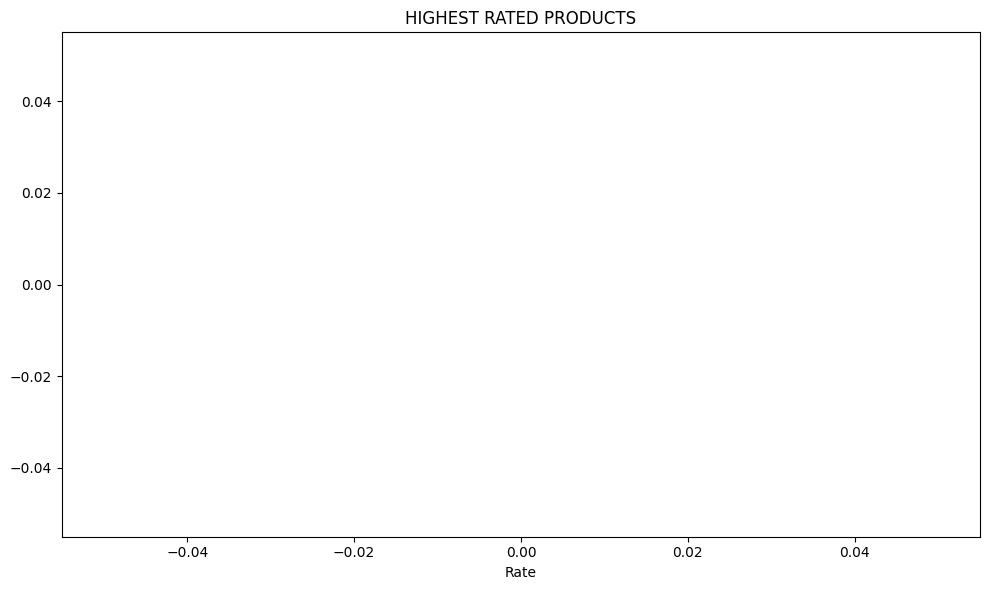

In [73]:
df = df.sort_values("rate", ascending=True)  
plt.figure(figsize=(10, 6))
plt.barh(df["name"], df["rate"])
plt.xlabel("Rate")
plt.title("HIGHEST RATED PRODUCTS")
plt.tight_layout()

plt.show()



### LOWEST RATED PRODUCTS

In [40]:
query = """
SELECT p1.name,p2.rate FROM products as p1
INNER JOIN ratings as p2
ON p1.rating_id = p2.id
ORDER BY rate ASC, count DESC
LIMIT 5
"""

In [44]:
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database='store' 
)
cursor = conn.cursor()

In [42]:
cursor.execute(query)

In [43]:
rows = cursor.fetchall()
df = pd.DataFrame(rows, columns=["name", "rate"])

cursor.close()
conn.close()


In [ ]:
df = df.sort_values("rate", ascending=False)  
plt.figure(figsize=(10, 6))
plt.barh(df["name"], df["rate"])
plt.xlabel("Rate")
plt.title("LOWEST RATED PRODUCTS")
plt.tight_layout()

plt.show()


### VISUALIZATION BY CATEGORIES

SHOW CATEOGORIES AND IDS

In [26]:
query = """
    SELECT id, name from categories
"""

cursor.execute(query)

rows = cursor.fetchall()
df = pd.DataFrame(rows, columns=["id", "name"])

cursor.close()
conn.close()
display(df)


,id,name
0,1,men's clothing
1,2,jewelery
2,3,electronics
3,4,women's clothing


#### SHOW HIGHEST RATED PRODUCTS BY CATEGORY

In [46]:
categories_list = df['id'].to_list()
category = int(input("Insert the category ID"))

if category not in categories_list:
    raise ValueError('Invalid category ID')

In [ ]:
query = '''
SELECT p1.name, 
    p2.rate 
FROM products AS p1 
INNER JOIN ratings AS p2 
ON p1.rating_id = p2.id 
WHERE p1.category_id = (%s) 
ORDER BY rate DESC, count DESC LIMIT 5;'''
params = [category]

cursor.execute(query,params)

rows = cursor.fetchall()


df = pd.DataFrame(rows, columns=["name", "rate"])



,name,rate
0,MBJ Women's Solid Short Sleeve Boat Neck V,4.7
1,Opna Women's Short Sleeve Moisture,4.5
2,Rain Jacket Women Windbreaker Striped Climbing...,3.8
3,DANVOUY Womens T Shirt Casual Cotton Short,3.6
4,Lock and Love Women's Removable Hooded Faux Le...,2.9


In [74]:
query_category_name = ('''
                       SELECT name
                       FROM categories
                       WHERE id = (%) 
                       ''')
cursor.execute(query_category_name,params)

df = df.sort_values("rate", ascending=True)  
plt.figure(figsize=(10, 6))
plt.barh(df["name"], df["rate"])
plt.xlabel("Rate")
plt.title(f"HIGHEST RATED PRODUCTS FROM CATEGORY")
plt.tight_layout()

plt.show()

ProgrammingError: Cursor is not connected